# Statistical Hypotheses: General concepts


In practice, **hypothesis testing** is widely used in **data-driven decision-making** to **draw conclusions** about **new features or interventions** in complex systems based on **experimental evidence**.


A **medical researcher** may make **decisions** based on **experimental data** collected from **two groups of cows**, to evaluate whether a new supplement added to their daily diet more **effectively reduces stress levels** in confined environments.


An **AI engineer** may **decide to deploy** a **newly optimized model** to production **based on** **sample data**, if it shows an **improvement** in a specific **Key Performance Indicator (KPI)** on new data **compared to** **current model** in production.

A **sociologist** might **collect data** to **determine** whether a person's **nose size** and **height** are **independent variables**.


In all these cases, an **engineer** or **scientist** **postulates** about a **system**. In addition, each of them **must rely** on **experimental data** to make a **decision** based on the collected sample.

In each case, the **conjecture** can take the form of a **statistical hypothesis**. The **procedure** that leads to its **acceptance or rejection** based on **sample data** lies at the **core of statistical inference**. 

<!-- Definition of statisitcal hypothesis:

<em>A **statistical hypothesis** is an assertion or conjecture concerning one or more
populations.</em> -->
--- 
> **Definition (Statistical Hypothesis):**  
> A statistical hypothesis is an assertion or conjecture concerning one or more populations.

> **A simpler definition:**
> A statistical hypothesis is a guess or assumption about a group or groups of data.
--- 

**Conjecture**: An educated guess or suspicion based on observation — but not yet formally proven.

A proposition that is proffered on a tentative basis without proof.

In mathematics, a conjecture is a proposition that is proffered on a tentative basis without proof.

---
<!-- 

Postulates: suggest or assume the existence, fact, or truth of (something) as a basis for reasoning, discussion, or belief. 

In mathematics, a conjecture is a proposition that is proffered on a tentative basis without proof.
-->

**Hypothesis testing** is usually based on a **sample of data**, **not** the entire **population**. As a result, the **truth or falsity** of a hypothesis can **never be known** with **absolute certainty** — it would only be **possible** if we could **observe** the entire **population**. 

This does not mean that **hypothesis testing** is **ineffective** due to its **impracticality**. On the contrary, the **Law of Large Numbers (LLN)** ensures that, as we collect **more samples** from the **population**, the **estimates of population parameters** become increasingly **accurate and less uncertain**.

Additionally, we rely on the **Central Limit Theorem (CLT)**, which states that the **sampling distribution** of the **sample mean** approaches a **normal distribution**, regardless of the **original population distribution**, provided the **sample size is sufficiently large**.

Thanks to **LLN and CLT**, we can draw a **random sample** from the **population of interest**, minimizing **sampling bias**, and use the resulting data to **support or reject** the proposed **hypothesis** with **statistical evidence**.

---

# The Role of Probability in Hypothesis Testing

**The decision process** of hypothesis testing **must include** an **awarenes** of the **<em>probability of a wrong conclution</em>**. 

As an example, **an engineer** postulated a hypothesis about the **defectiveness rate** of a **certain process**. The **hypothesized probability** of a **defective item** (binomial probability p) was **10%**. To test this, he **randomly selected 100 items** from the process output and **found** that **12 were defective**, suggesting an **observed defect rate of 12%**.

It is **reasonable to conclude** that this experiment **does not refute** the **initial hypothesis**. The observed value **(12%) is close to the hypothesized value (10%)**, and the **sample size** is relatively **small**, which may result in **sampling variability** and may **not accurately** **represent** the **true population**.

However, **this result does not confirm** that the true **defect rate is exactly 10%**. The actual **population proportion could be 9%, 12%, or even 15%**.

In **hypothesis testing**, **rejecting the proposed hypothesis** means that the **sample data** provides **sufficient evidence against it**. However, **not rejecting** the **hypothesis** does not mean the **population parameter is exactly equal to the proposed value** (e.g., p=0.10).

In other words, **it's possible** to **reject the null hypothesis** even if it **matches** the **true population value** — because the **sample data might still contradict it**. In such a case, the engineer may **reject a "true" hypothesis due to random variation in the sample**.

---

Why is the binomial distribution mentioned in the example? That’s because we are dealing with multiple independent Bernoulli trials (where "success" is a defective item, and otherwise it’s non-defective), which leads naturally to the binomial distribution.

As a quick recap of the binomial data distribution, let's compute the probability of observing 20 defective items in a sample, assuming the process follows a Bernoulli population distribution with a defect probability of 10%.


Thanks to the setup of multiple independent Bernoulli trials, where each trial has:
- Success = defective item
- Failure = non-defective item
- Probability of success (defective): p=0.10
- Number of trials: n=100

We are gonna compute:

P(X=20) where X ~ Binomial(n=100, p=0.10)

This represents the probability of getting exactly 20 defective items from data sampled from a binomial distribution with 100 trials and a 10% probability of success.

--- 
Binomial data distribution PMF (Probability Mass Function)

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Where:
- $\binom{n}{k} = \frac{n!}{k!(n - k)!}$ is the binomial coefficient (number of ways to choose k successes from n trials)
- $p^k$: probability of getting k successes (defectives)
- $(1 - p)^{n - k}$: probability of getting n - k failures (non-defectives)

In [52]:
import math 


def binomial_coefficient(n: int, k: int) -> int:
    return math.factorial(n) / ( math.factorial(k) * math.factorial( (n-k) ) ) 


def binomial_probability(n: int, k: int, p: float) -> float:
    """Probability of getting exactly k successes"""
    return binomial_coefficient(n, k) * (p ** k) * ((1 - p) ** (n - k))


def cumulative_binomial_probability(n: int, k: int, p: float, tail: str = "greater") -> float:
    """
    Cumulative probability: P(X >= k) or P(X <= k)
    tail: 'greater' for P(X ≥ k), 'less' for P(X ≤ k)
    """
    if tail == "greater":
        return sum(binomial_probability(n, i, p) for i in range(k, n + 1))
    elif tail == "less":
        return sum(binomial_probability(n, i, p) for i in range(0, k + 1))
    else:
        raise ValueError("tail must be 'greater' or 'less'")

In [58]:
probability = binomial_probability(n=100, k=20, p=0.1)
print("P(X == 20) where X ~ Binomial(n=100, p=0.1): {}".format(probability))

P(X == 20) where X ~ Binomial(n=100, p=0.1): 0.0011709869914049687


In [59]:
cumulative_probability = cumulative_binomial_probability(n=100, k=20, p=0.1)
print("P(X >= 20) where X ~ Binomial(n=100, p=0.1): {}".format(cumulative_probability))

P(X >= 20) where X ~ Binomial(n=100, p=0.1): 0.0019785608657712376


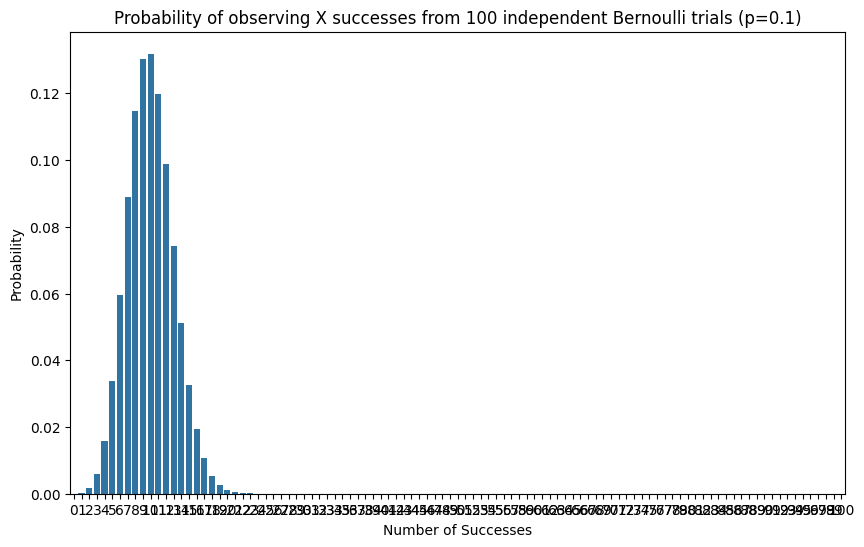

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import binom


n = 100                               # number of trials
p = 0.1                               # probability of success

pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
sns.barplot(pmf, orient="v")
plt.title(f"Probability of observing X successes from {n} independent Bernoulli trials (p={p})")
plt.ylabel("Probability")
plt.xlabel("Number of Successes")
plt.show()

---

In another example, the engineer collects **a random sample of 100 items** from the process and observes **20 defective** items. This is considered **evidence** for **rejecting the hypothesis**. But why?

Suppose the engineer had **hypothesized** that the true **defect probability is p=0.10**. Under this assumption, the probability of **observing 20 or more defectives out of 100 items is approximately 0.002**, as we computed earlier.

Such a **low probability** implies that if the true defect rate really were **10%**, it would be extremely **unlikely** to **observe 20 or more defectives** just due to random chance. Therefore, the data provides **strong evidence against the hypothesis $H_0$:p=0.10**.

Given this **small risk (just 0.2%)** of **wrongly rejecting a true hypothesis**, it is considered **statistically safe to reject** the hypothesis in this case.

---

### The structure of hypothesis test as follows:
1. Start by assuming **the null hypothesis is true**;
2. You then assess whether the data is **unlikely under that assumtion**;
3. If it is, you **reject the null** - and this gives **support** to the **alternative**.

<em>**You never “prove” a hypothesis; you just reject the null with a controlled risk of being wrong.** </em>

### When you need to support a claim, make it alternative.

Suppose, you are a medical student who wants to show **coffe increases cancer risk**

**Do not** make it as a null hypothesis, it is alternative. 

So, you state:

<center>
$H_0$: Coffee does NOT increase cancer risk
</center>
<center>
$H_1$: Coffee DOES increase cancer risk
</center>

Why?

Because:

You can only reject $H_0$, not confirm $H_1$ directly.

If you want to "support" a claim, you must **arrive at it by rejecting the opposite.**

---

# The Null and Alternative Hypotheses

The structure of hypothesis testing will be formulated by the use of the term **null hypothesis**, which refers to anu hypothesis we wish to test and denoted by $H_0$. The rejection of $H_0$ leads to the acceptance of an **alternative hypothesis**, denoted by $H_1$. 

The alternative hypothesis $H_1$ usually represents the <em>question to be answered or the theory to be tested</em>. On the other hand, the null hypothesis $H_0$ nullifies or opposes $H_1$. 

In hypothesis testing the analyst comes in conclution by the two conclutions: 

<em>**reject**</em> **$H_0$** in favor of $H_1$ because of sufficient evidence in the data or

<em>**fail to reject**</em> **$H_0$** because of insufficient evidence in the data.

Note, that the conclusions do not involve a formal and literal “accept $H_0$.” The statement of $H_0$ often represented as "status quo" in opposition of new idea $H_1$. The **fail to reject $H_0$** represents the **proper conclution**

In the binomial example above, we were concerned that the historical defective probability of 0.1 is may no longer be true. Indeed, the conjecture may be that p exceeds 0.1. We may then state:

$H_0$: p = 0.1

$H_1$: p > 0.1

In the experiment above, where the Binomial distribution served as  population data distribution of a certain process output. The process in the first example has generated 12 defectives out of 100 independent observations, and under $H_0$: p = 0.1, the conclution is **<em>"Fail to reject $H_0$"</em>** because, these probaility values in the context of binomial distribution with p=0.1 are close to each other. We do not have a significance evidence from sample data to reject $H_0$. However, when the system has produced 20 defective items, then the conclution is **<em>"Reject $H_0$"</em>** in favor of $H_1$: p > 0.1. 

---

The applications of hypothesis testing might be abundant in scientific and engineering work, if so, this illustration might fit into your mind.

### A Jury Trial Dilemma: The Null and Alternative Hypotheses:

$H_0$: defendant is innocent,

$H_1$: defendant is guilty.

The null hypothesis sttatus quo stands in opposition to $H_1$ and is maintained unless $H_1$ is supported by evidence **"beyond a reasonable doubt"**. However, **"failure to reject $H_0$"** in this case does not imply innocence, but the evidence which could support guiltiness of the defendant was insufficient to convict. So the jury does not neccessary accept $H_0$ but fails to reject $H_0$. **This means the defendant is not proven guilty — not necessarily innocent. The jury failed to reject the assumption of innocence.**